In [2]:
# Importing necessary libraries
import os
import pandas as pd
from dotenv import load_dotenv
import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
import requests
import numpy as np
import datetime as dt
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import seaborn as sns
from MCForecastTools import MCSimulation
%matplotlib inline
import pyttsx3
engine= pyttsx3.init()


Bad key savefig.frameon in file C:\Users\alexg\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\alexg\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\alexg\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get 

In [3]:
# Import returns_df.csv for cumulative returns plot
cumreturns_combined = pd.read_csv("returns_df.csv", index_col='time')
# Import daily_returns_all_df.csv for daily returns plt
daily_returns_combined = pd.read_csv("daily_returns_all_df.csv",index_col='time')

In [4]:
# Load .env enviroment variables
load_dotenv()

True

In [71]:
# Getting initial user inputs
name = input("Welcome to the Group 1 Robo Advisor! \nWe're so glad you've chosen us to help meet your investment needs. \nLet's get to know you a little better. What's your name? ")
age = int(input(f"How old are you? "))
retirement_age = int(input("Please enter the age at which you want to retire: "))
years_to_invest = retirement_age - age

Welcome to the Group 1 Robo Advisor! 
We're so glad you've chosen us to help meet your investment needs. 
Let's get to know you a little better. What's your name?  Alex
How old are you?  35
Please enter the age at which you want to retire:  65


In [72]:
# Greet user
Greeting = f"Hello {name}! I see that you are {age}! It's never too early to start saving for retirement! Based on your desired retirement age, you have {years_to_invest} years to build up your nest egg. As your robo advisor, I'm here to make sure you find the investment strategy that works best for you. Let me start by asking you a few questions."

In [73]:
engine.say(Greeting)
engine.runAndWait()

In [74]:
# Gather background info from user
question_1 = input("Have you ever owned stocks or bonds? Yes/No")
if question_1 == "Yes":
    print("Great, then you probably already know stocks and bonds are an important part of a portfolio.")
else:
    print("No problem! Stocks and bonds are an important part of a portfolio.")
question_2 = input("Have you ever owned precious metals or real estate? Yes/No")
if question_2 == "Yes":
    print("Great, then you'll be excited to know that we can include precious metal and real estate funds in your customized retirement portfolio.")
else:
    print("No problem! We sometimes add precious metals and real estate funds to our customers' portfolios when it fits in their customized retirement plan.")

Have you ever owned stocks or bonds? Yes/No yes


No problem! Stocks and bonds are an important part of a portfolio.


Have you ever owned precious metals or real estate? Yes/No yes


No problem! We sometimes add precious metals and real estate funds to our customers' portfolios when it fits in their customized retirement plan.


In [75]:
# Educate user with plot of cumulative returns
print("Before we move on, take a look at the following chart, which presents the cumulative returns for each of the afore mentioned asset classes.")
print("Keep in mind that these types of results are not guaranteed. But it does highlight the relative performance of each asset class.")
# Display plot comparing cumulative returns for all asset classes
cumreturns_combined.hvplot()

Before we move on, take a look at the following chart, which presents the cumulative returns for each of the afore mentioned asset classes.
Keep in mind that these types of results are not guaranteed. But it does highlight the relative performance of each asset class.


:NdOverlay   [Variable]
   :Curve   [time]   (value)

In [76]:
# Summarize cumulative returns plot
print("As you can see, stocks have historically outperformed other asset classes. But stocks also tend to be more volatile, as you can see in the following chart.")

As you can see, stocks have historically outperformed other asset classes. But stocks also tend to be more volatile, as you can see in the following chart.


In [77]:
# Assess user's risk tolerance
print("Next, we'll ask you a few questions to understand your risk tolerance and portfolio makeup preferences. That way we can design the perfect portfolio for you.")
amt_of_risk = int(input(f"You're on a TV game show and can choose one of the following. Which would you take? \n1) $1,000 in cash\n2) A 50% chance at winning $5,000\n3) A 5% chance at winning $100,000 \nChoose 1, 2, or 3: "))

Next, we'll ask you a few questions to understand your risk tolerance and portfolio makeup preferences. That way we can design the perfect portfolio for you.


You're on a TV game show and can choose one of the following. Which would you take? 
1) $1,000 in cash
2) A 50% chance at winning $5,000
3) A 5% chance at winning $100,000 
Choose 1, 2, or 3:  3


In [78]:
# Based on user input, assign risk tolerance variable string value
if amt_of_risk == 1:
    risk_tolerance = "conservative"
elif amt_of_risk == 2:
    risk_tolerance = "moderate"
elif amt_of_risk == 3:
    risk_tolerance = "aggressive"

In [79]:
# Same approach but for determining stock and bonds, stocks bonds and metals, or stocks bonds metals and real estate
portfolio_mix = int(input(f"Which statement best describes you?\n1) I'm a traditional stocks and bonds investor.\n2) I like the idea of mixing in precious metals into my portfolio.\n3) I want to diversify as much as possible by including real estate.\nSo which will it be? 1, 2, or 3? "))

Which statement best describes you?
1) I'm a traditional stocks and bonds investor.
2) I like the idea of mixing in precious metals into my portfolio.
3) I want to diversify as much as possible by including real estate.
So which will it be? 1, 2, or 3?  1


In [80]:
# More user inputs
# 1) Initial investment portfolio funding
# 2) Future contributions to investment portfolio
print(f"Great, thanks so much {name}! We are almost done. Let's confirm how much money you want to contribute to your retirement portfolio.")
print('\n')
initial_investment = int(input("How much money do you want to start off with in your portfolio? "))
recurring_invest = int(input("How much money do you plan on contributing each year? "))

Great, thanks so much Alex! We are almost done. Let's confirm how much money you want to contribute to your retirement portfolio.




How much money do you want to start off with in your portfolio?  20000
How much money do you plan on contributing each year?  1000


In [81]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(alpaca_api_key)

str

In [82]:
# Create the Alpaca API object to pull in data sets
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [83]:
# Set start and end dates of TEN years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2010-12-10', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-12-09', tz='America/New_York').isoformat()

In [84]:
# Get 10 years' worth of historical data
# Pull in Bonds, S&P500, gold ETF, and real estate ETF tickers
tickers = ["AGG", "SPY", "IAU", "VNQ"]
# Update tickers for client's preferred portfolio mix
del tickers[(portfolio_mix + 1):]

In [85]:
# Weight portfolio weights based on client's risk tolerance and preferred portfolio mix
user_weights = []
if risk_tolerance == 'conservative' and portfolio_mix == 1:
    user_weights = [.70, .30]
elif risk_tolerance == 'conservative' and portfolio_mix == 2:
    user_weights = [.60, .30, .10]
elif risk_tolerance == 'conservative' and portfolio_mix == 3:
    user_weights = [.60, .20, .15, .5]
elif risk_tolerance == 'moderate' and portfolio_mix == 1:
    user_weights = [.50, .50]
elif risk_tolerance == 'moderate' and portfolio_mix == 2:
    user_weights = [.35, .35, .30]
elif risk_tolerance == 'moderate' and portfolio_mix == 3:
    user_weights = [.25, .25, .25, .25]
elif risk_tolerance == 'aggressive' and portfolio_mix == 1:
    user_weights = [.30, .70]
elif risk_tolerance == 'aggressive' and portfolio_mix == 2:
    user_weights = [.10, .60, .30]
elif risk_tolerance == 'aggressive' and portfolio_mix == 3:
    user_weights = [.10, .60, .15, .15]

In [86]:
# Set timeframe
timeframe = "1D"
# Get the data
df_portfolio_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
# Display sample data
df_portfolio_data.tail()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2020-12-03 00:00:00-05:00  117.92  117.9800  117.7650  117.91  5210910.0   
2020-12-04 00:00:00-05:00  117.90  117.9000  117.5133  117.58  4821820.0   
2020-12-07 00:00:00-05:00  117.76  117.8262  117.6900  117.75  4689469.0   
2020-12-08 00:00:00-05:00  117.88  117.9597  117.7500  117.77  3587353.0   
2020-12-09 00:00:00-05:00  117.73  117.7800  117.5172  117.62  4720359.0   

                              SPY                                      
                             open    high     low     close    volume  
time                                                                   
2020-12-03 00:00:00-05:00  366.68  368.19  365.50  366.6698  52905586  
2020-12-04 00:00:00-05:00  367.32  369.85  367.22  369.8300  40264568  
2020-12-07 00:00:00-05:00  369.02  369.62  367.72  369.1200  40456544  
2020-12-08 00:00:00-05:00  367.72  370.78  367.67  370.1599  32702217  
2020-12-09 00:00:00-05:00  370.88  371.05  365.95  366.8900  60700254

In [87]:
# Check for null values
df_portfolio_data.isnull().mean()*100

AGG  open      0.03973
     high      0.03973
     low       0.03973
     close     0.03973
     volume    0.03973
SPY  open      0.00000
     high      0.00000
     low       0.00000
     close     0.00000
     volume    0.00000
dtype: float64

In [88]:
# Drop nulls
df_portfolio_data = df_portfolio_data.dropna()
df_portfolio_data
df_portfolio_data.isnull().mean()*100

AGG  open      0.0
     high      0.0
     low       0.0
     close     0.0
     volume    0.0
SPY  open      0.0
     high      0.0
     low       0.0
     close     0.0
     volume    0.0
dtype: float64

In [89]:
# Configuring a Monte Carlo simulation to forecast x # of years based on client's years to invest. cumulative returns
MC_simulation_data = MCSimulation(
    portfolio_data = df_portfolio_data,
    weights = user_weights,
    num_simulation = 500,
    num_trading_days = 252 * years_to_invest)

In [90]:
# Print the simulation input data to confirm we have daily returns
MC_simulation_data.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
time                                                                   
2010-12-10 00:00:00-05:00  105.49  105.49  105.21  105.29  1191047.0   
2010-12-13 00:00:00-05:00  105.09  105.48  104.97  105.39  1666666.0   
2010-12-14 00:00:00-05:00  105.16  105.28  104.60  104.78   921506.0   
2010-12-15 00:00:00-05:00  104.86  104.99  104.36  104.58  1321407.0   
2010-12-16 00:00:00-05:00  104.50  104.84  104.30  104.82  1618077.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2010-12-10 00:00:00-05:00          NaN  124.13  124.60  123.73  124.51   
2010-12-13 00:00:00-05:00     0.000950  125.05  125.20  124.52  124.55   
2010-12-14 00:00:00-05:00    -0.005788  124.75  125.23  124.29  124.65   
2010-12-15 00:00:00-05:00    -0.001909  124.45  124.93  123.89  124.10   
2010-12-16 00:00:00-05:00     0.002295  124.18  124.91  123.75  124.79   

                                                   
                              volume daily_return  
time                                               
2010-12-10 00:00:00-05:00   97866232          NaN  
2010-12-13 00:00:00-05:00  101179383     0.000321  
2010-12-14 00:00:00-05:00  117724891     0.000803  
2010-12-15 00:00:00-05:00  126044563    -0.004412  
2010-12-16 00:00:00-05:00  124893657     0.005560

In [91]:
# Run the Monte Carlo simulation to forecast X # of years cumulative returns
MC_cumulative_returns = MC_simulation_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

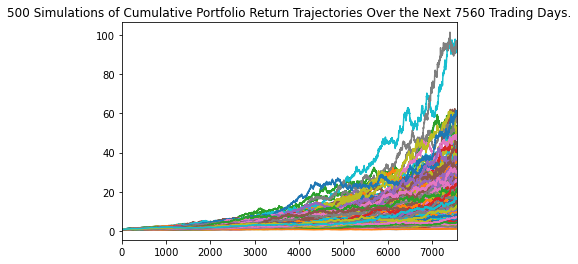

In [92]:
# Plot simulation outcomes
line_plot= MC_simulation_data.plot_simulation()

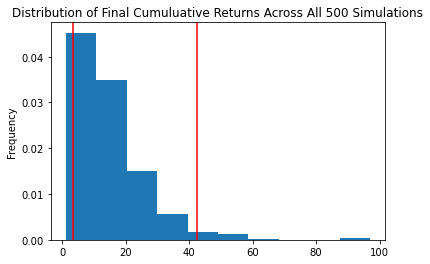

In [93]:
# Plot probability distribution and confidence intervals
dist_plot=MC_simulation_data.plot_distribution()

In [94]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl= MC_simulation_data.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             15.064903
std              11.277247
min               1.061683
25%               7.765009
50%              11.820398
75%              19.189950
max              96.993303
95% CI Lower      3.270231
95% CI Upper     42.292999
Name: 7560, dtype: float64


In [95]:
# get mean portfolio value of initial investment to calculate % return
mean_init_amount = round(tbl[1]*initial_investment,2)
mean_init_amount

301298.07

In [96]:
# calculate mean annual return
mean_init_percent = (mean_init_amount/initial_investment)**(1/years_to_invest)-1
mean_init_percent
mean_percent_formatted = mean_init_percent*100
mean_percent_formatted = round(mean_percent_formatted,2)

In [97]:
# use fv function to calculate MEAN future value of the investment based on user inputs. set compounding frequency to once per year
compounding_frequency = 1
mean_fv = round(np.fv(mean_init_percent/compounding_frequency,
               years_to_invest * compounding_frequency,
               -recurring_invest,
               -initial_investment),2)
mean_fv

C:\Users\alexg\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: numpy.fv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.fv instead (https://pypi.org/project/numpy-financial/).
  


449935.69

In [98]:
# get CI LOWER 95% portfolio value of initial investment to calculate % return
ci_lower_init_amount = round(tbl[8]*initial_investment,2)
ci_lower_init_amount
# calculate CI LOWER 95% annual return
ci_lower_init_percent = (ci_lower_init_amount/initial_investment)**(1/years_to_invest)-1
ci_lower_init_percent
# use fv function to calculate CI LOWER 95% future value of the investment based on user inputs. set compounding frequency to once per year
ci_lower_fv = round(np.fv(ci_lower_init_percent/compounding_frequency,
               years_to_invest * compounding_frequency,
               -recurring_invest,
               -initial_investment),2)
ci_lower_fv

C:\Users\alexg\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: numpy.fv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.fv instead (https://pypi.org/project/numpy-financial/).
  # This is added back by InteractiveShellApp.init_path()


121757.94

In [99]:
# get CI UPPER 95% portfolio value of initial investment to calculate % return
ci_upper_init_amount = round(tbl[9]*initial_investment,2)
ci_upper_init_amount
# calculate CI UPPER 95% annual return
ci_upper_init_percent = (ci_upper_init_amount/initial_investment)**(1/years_to_invest)-1
ci_upper_init_percent
# use fv function to calculate CI UPPER 95% future value of the investment based on user inputs. set compounding frequency to once per year
ci_upper_fv = round(np.fv(ci_upper_init_percent/compounding_frequency,
               years_to_invest * compounding_frequency,
               -recurring_invest,
               -initial_investment),2)
ci_upper_fv

C:\Users\alexg\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: numpy.fv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.fv instead (https://pypi.org/project/numpy-financial/).
  # This is added back by InteractiveShellApp.init_path()


1156461.37

In [100]:
# Savings Account portfolio value 
savings_acct_percent = .001
# use fv function to calculate future value of the investment if only in a savings account. set compounding frequency to once per year
savings_account_fv = round(np.fv(savings_acct_percent/compounding_frequency,
               years_to_invest * compounding_frequency,
               -recurring_invest,
               -initial_investment),2)
savings_account_fv
opportunity_cost = mean_fv - savings_account_fv

C:\Users\alexg\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: numpy.fv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.fv instead (https://pypi.org/project/numpy-financial/).
  import sys


C:\Users\alexg\anaconda3\envs\dev\lib\site-packages\pandas\plotting\_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


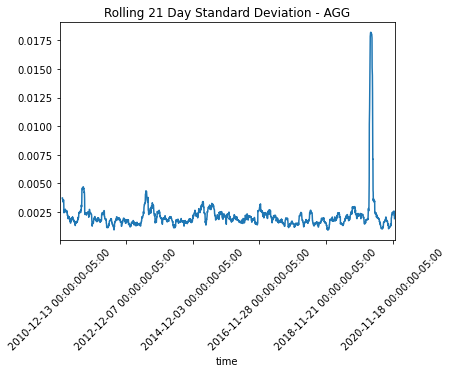

In [101]:
AGG_std = daily_returns_combined['AGG'].rolling(window=21).std().plot(rot=45,title="Rolling 21 Day Standard Deviation - AGG")

C:\Users\alexg\anaconda3\envs\dev\lib\site-packages\pandas\plotting\_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


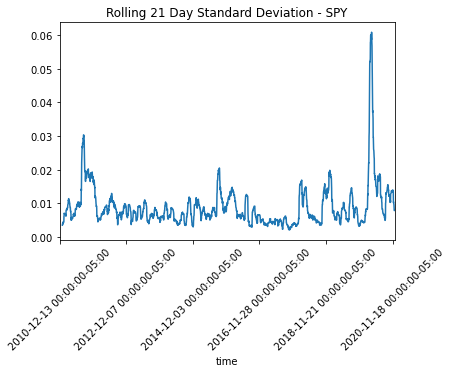

In [102]:
SPY_std = daily_returns_combined['SPY'].rolling(window=21).std().plot(rot=45,title="Rolling 21 Day Standard Deviation - SPY")

C:\Users\alexg\anaconda3\envs\dev\lib\site-packages\pandas\plotting\_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


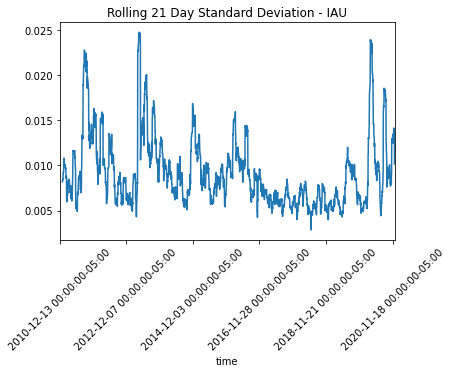

In [103]:
IAU_std = daily_returns_combined['IAU'].rolling(window=21).std().plot(rot=45,title="Rolling 21 Day Standard Deviation - IAU")

C:\Users\alexg\anaconda3\envs\dev\lib\site-packages\pandas\plotting\_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


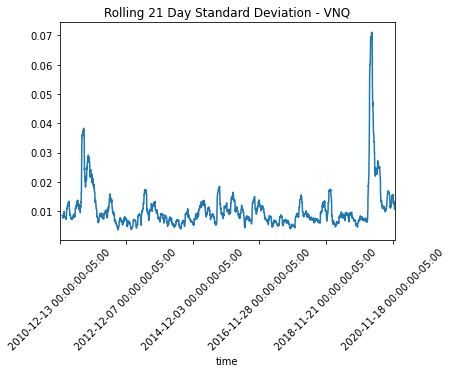

In [104]:
VNQ_std = daily_returns_combined['VNQ'].rolling(window=21).std().plot(rot=45,title="Rolling 21 Day Standard Deviation - VNQ")

In [116]:
#containerize each tab

welcome_tab = pn.Column(
    "#Welcome to your custom Robo Advisor Dashboard!",
    "##At Robo Advisor, our mission is to make investing easier to understand, low cost, and demonstrate how even a small investment over time can have a big impact!##",
    "###This dashboard will provide you with an overview of your investment decisions and your estimated investment returns.\n Questions? Email us! @ group1advisor@fintech.com."
    )
historical_info_tab = pn.Column(
    "## The charts below can help give you a better sense of how each asset class has performed over the last 10 years ##",
    "If you would like to learn more, check out the links below:",
    "[S&P 500 ETF](https://www.marketwatch.com/investing/fund/spy)",
    "[Aggregate Bond ETF](https://www.marketwatch.com/investing/fund/agg)",
    "[Gold Trust](https://www.marketwatch.com/investing/fund/iau)",
    "[Vanguard Real Estate ETF](https://www.marketwatch.com/investing/fund/vnq)",
    "### Cumulative Returns for Each Asset from 2010 to 2020 ###",
    cumreturns_combined.hvplot(),
    "### Standard Deviation for Each Asset ###",
    AGG_std.figure,
    SPY_std.figure,
    IAU_std.figure,
    VNQ_std.figure
    )
expected_returns_tab = pn.Column(
    f"Congratulations! Your initial investment of ${initial_investment} and annual contributions of ${recurring_invest} has an expected average return of ${mean_fv}!\n"
    f"A lot could happen in the next {years_to_invest} years, but there is a 95% chance that your return will be within the range of ${ci_lower_fv} and ${ci_upper_fv}.\n"
      f"Thank you, {name}! It has been a pleasure serving you today. I hope this has helped make investing a little less scary, and give you a better picture of how you can put your money to work!",
    line_plot.figure,
    dist_plot.figure,
    f"If you're feeling especially nerdy, here are some additional statistics about your simulated portfolio :)",
    tbl,
    width= 750
    )

opportunity_cost_tab = pn.Column(
    " ## Sitting on the sidelines can be expensive! ##", 
    f"Did you know the average savings account provides a 0.1% return? Based on your investment choices, you could generate {mean_percent_formatted}%!\n",
    f"Putting the same initial investment of ${initial_investment} and annual contributions of ${recurring_invest} into a savings account would only generate ${savings_account_fv}, compared to {mean_fv}.\n"
    f"That's a difference of {opportunity_cost}!",
    pn.indicators.Number(name='Opportunity Cost', value=round(opportunity_cost,2), format='${value}')
    )
panel_tabs = pn.Tabs(
    ("Welcome", welcome_tab),
    ("Historical Data", historical_info_tab),
    (f"{name}'s Expected Returns", expected_returns_tab),
    ("Opportunity Cost", opportunity_cost_tab)
    )

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Markdown(str)
    [1] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Markdown(str)
        [3] Markdown(str)
        [4] Markdown(str)
        [5] Markdown(str)
        [6] Markdown(str)
        [7] HoloViews(NdOverlay)
        [8] Markdown(str)
        [9] Matplotlib(Figure)
        [10] Matplotlib(Figure)
        [11] Matplotlib(Figure)
        [12] Matplotlib(Figure)
    [2] Column(width=750)
        [0] Markdown(str)
        [1] Matplotlib(Figure)
        [2] Matplotlib(Figure)
        [3] Markdown(str)
        [4] DataFrame(Series)
    [3] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Markdown(str)
        [3] Number(format='${value}', name='Opportunity Cost', value=398887.82)
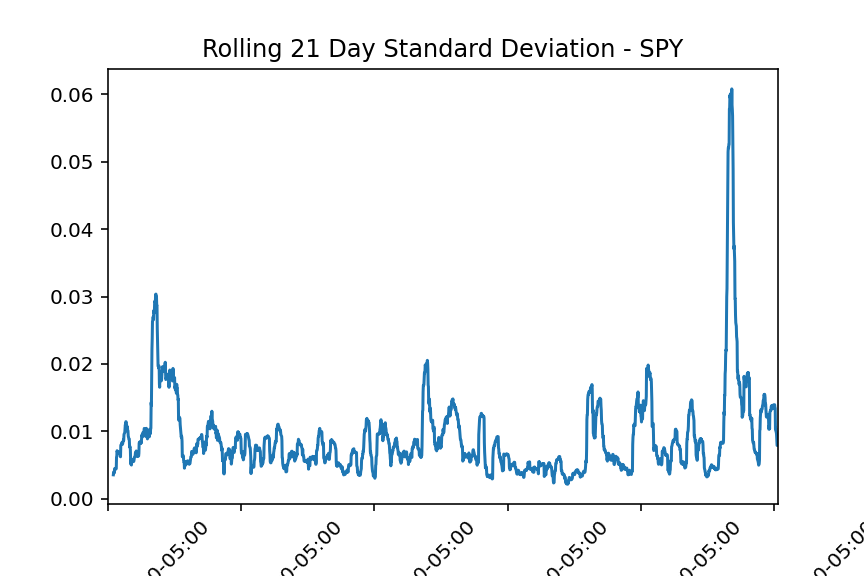
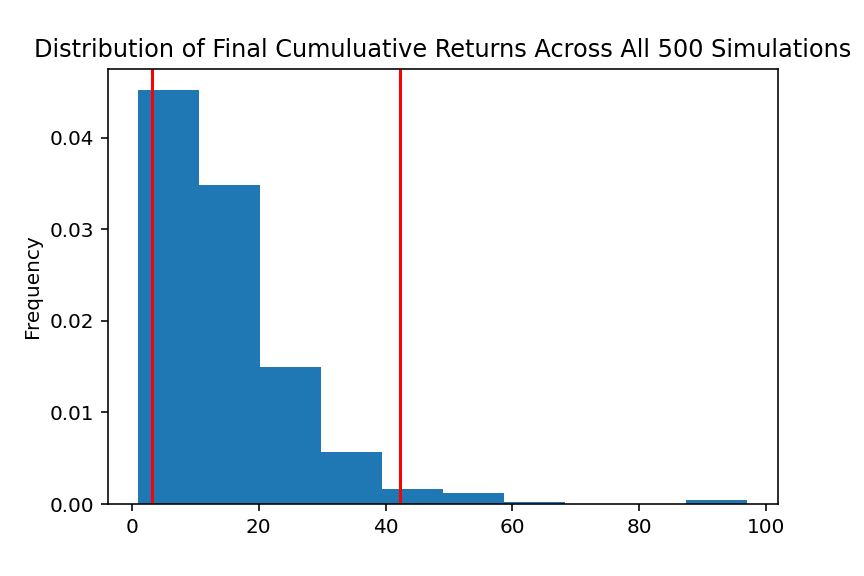
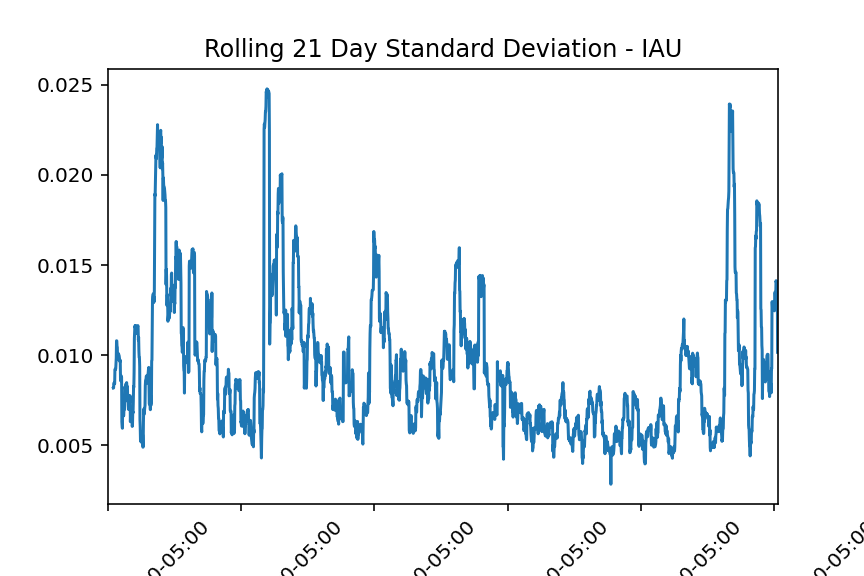
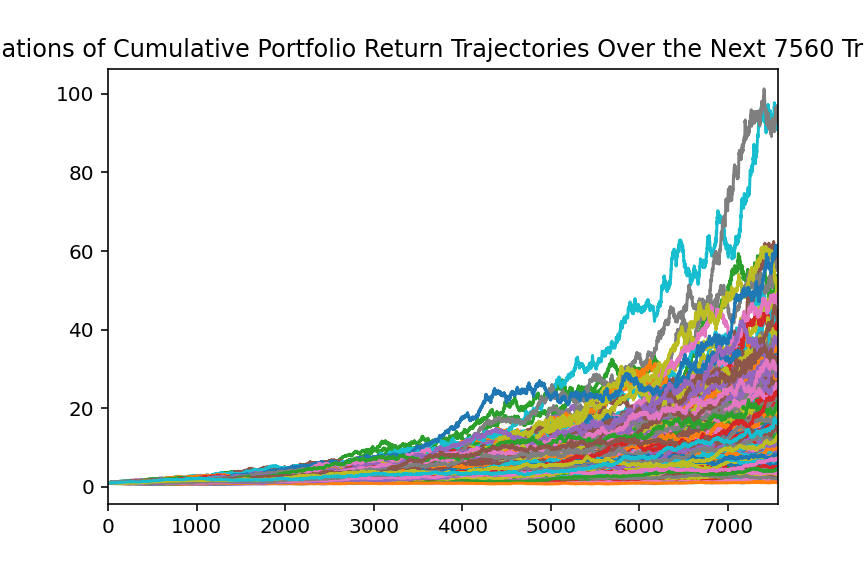
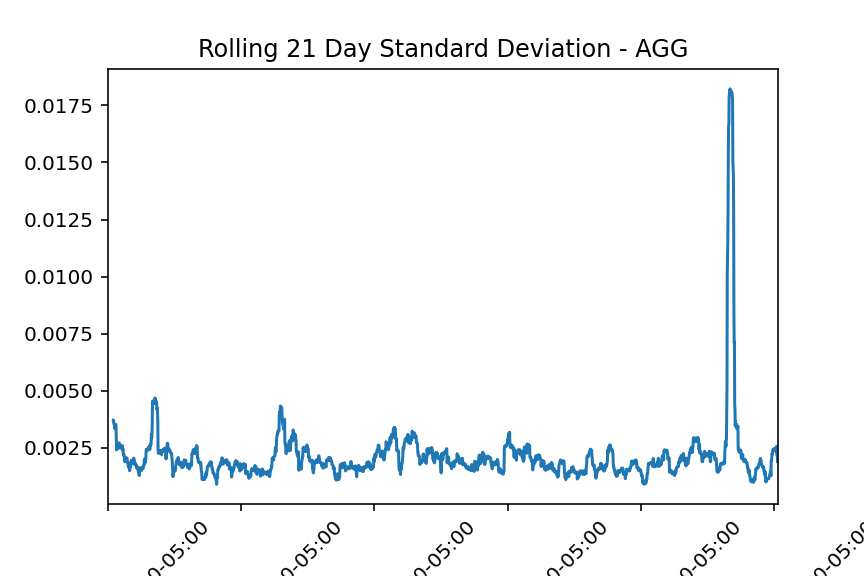

In [117]:
panel_tabs.servable()